In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ロジスティック回帰
ロジスティック回帰はインスタンスが特定の属性に属する確率を推計するための手法である.(例.メールがスパムである確率)このノートではdata4(あやめの花のデータ)を用いて品種を検出する分類器を作成する.

In [13]:
df = pd.read_csv("data4.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


特徴量の意味
- sepal length (cm) : ガクの長さ
- sepal width (cm) : ガクの幅
- petal length (cm) : 花弁の長さ
- petal width (cm) : 花弁の幅
- target : 花の種類(カテゴリカル)
    - 0 : setosa(セトナ)
    - 1 : versicolor(バーシクル)
    - 2 : virginica(バージニカ)

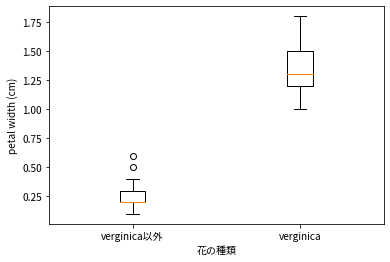

In [26]:
plt.figure(facecolor="white")
plt.boxplot([df[df["target"]==0]["petal width (cm)"],df[df["target"]==1]["petal width (cm)"]],labels=["verginica以外","verginica"])
plt.xlabel("花の種類")
plt.ylabel("petal width (cm)")
plt.show()

## scikit-learnによるロジスティック回帰

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


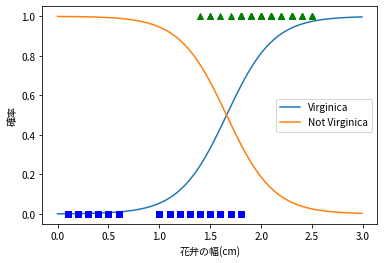

In [51]:
from sklearn.linear_model import LogisticRegression

X = df["petal width (cm)"].to_numpy().reshape(-1,1) # 花弁の幅を抽出
y = (df["target"]==2).astype(np.int).to_numpy().reshape(-1,1) # verginicaなら1,他は0

model = LogisticRegression()
model.fit(X,y)

Xpred = np.arange(0,3,0.01).reshape(-1,1) # プロット用の行列を生成
ypred = model.predict_proba(Xpred) # predict_probaにすると確率を計算する

plt.figure(facecolor="white")
# 確率を表す曲線を描画
plt.plot(Xpred,ypred[:,1],label="Virginica")
plt.plot(Xpred,ypred[:,0],label="Not Virginica")
# データセットの値をプロット
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.xlabel("花弁の幅(cm)")
plt.ylabel("確率")
plt.legend()
plt.show()

結果から花弁の幅が1cmより小さい,または2cmより長いときに自信を持って判断することができる.一方で1.6cmのとき判断に自信がなくなり,両方の確率が50%になる(決定境界).